In [6]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [9]:
# Read in the california housing data set
housing_df = pd.read_csv('../Resources/California_Housing.csv')
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
...,...,...,...,...,...,...,...,...
2995,4.5724,4.0,6.837037,1.229630,352.0,2.607407,35.10,-117.98
2996,3.6031,52.0,3.702592,1.062756,1438.0,1.961801,37.77,-122.43
2997,5.2820,24.0,5.918495,1.000000,950.0,2.978056,32.85,-117.00
2998,1.3668,52.0,2.673635,1.089431,1515.0,1.759582,37.79,-122.41


In [10]:
# Determine which measure of central tendency is most appropriate to describe the Population
housing_df["Population"].describe()


housing_df["Population"].mean()



1387.9633333333334

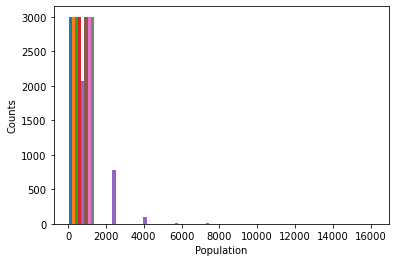

NormaltestResult(statistic=array([  3.92517879,   2.82016994,  89.05798577, 107.75687298,
         7.2363213 ,   8.32926143,  14.69404486,  71.01366609]), pvalue=array([1.40494154e-01, 2.44122539e-01, 4.58462802e-20, 3.98925997e-24,
       2.68319846e-02, 1.55354509e-02, 6.44508576e-04, 3.79820446e-16]))


In [14]:
# Determine if the house age in California is considered normally distributed

plt.hist(housing_df)
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(housing_df.sample(50)))

In [29]:
# Determine if there are any potential outliers in the average occupancy in California

quartiles = housing_df["Population"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Population is: {lowerq}")
print(f"The upper quartile of Population is: {upperq}")
print(f"The interquartile range of Population is: {iqr}")
print(f"The the median of Population is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Population is: 773.0
The upper quartile of Population is: 1677.5
The interquartile range of Population is: 904.5
The the median of Population is: 1152.5 
Values below -583.75 could be outliers.
Values above 3034.25 could be outliers.


In [32]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"Min income of potential outliers {housing_df ['MedInc'].min()}")
print(f"Max income of potential outliers {housing_df ['MedInc'].max()}")


Min income of potential outliers 0.4999
Max income of potential outliers 15.0001


In [ ]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.